<a href="https://colab.research.google.com/github/1wikii/decision-tree-on-predictions-of-employees-backup/blob/main/121140044_121140098_121140067_Tugas_Supervise_Learning_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Supervise Learning | Intelegensi Buatan (RB)
## Decision Tree on Prediction of Employee Resignations

---

### Nama Anggota Kelompok
```
121140044   Ahmad Dwiky Zerro Dixxon
121140067   Daris Fikri Zhalifunnas
121140098   Benedictus Budhi Dharmawan
```



### KARAKTERISTIK PADA DATASET DAN TUJUAN ANALISIS
>Dataset yang digunakan kali ini mengandung informasi terkait para pegawai di dalam suatu perusahaan. Konten utama pada setiap kolom di dalam dataset ini terdiri dari :

1. Riwayat Edukasi
2. Tahun bergabung
3. Kota tempat tinggal/tempat bekerja
4. Tingkat Gaji
5. Usia
6. Jenis Kelamin
7. Sudah/Belum Pernah Cuti
8. Pengalaman Bekerja pada Perusahaan Saat Ini (Tahun)
9. Meninggalkan atau Tidak

>Tujuan utama analisis pada dataset ini adalah untuk memprediksi persentasi kemungkinan seorang pegawai mengundurkan diri dari perusahaan saat ini. Perhitungan dilakukan dengan mengkaji seluruh data dalam dataset menggunakan metode supervised learning dengan jenis decision tree.

## Decision Tree

> Decision tree adalah metode yang mempermudah pengambilan keputusan, metode ini diinterpretasikan melalui struktur seperti pohon sesuai dengan Namanya. Cabang-cabang yang ada di pohon mewkili setiap Langkah pengambilan keputusan hingga akhirnya mengarahkan kepada pilihan yang terbaik.
Tujuan decision tree adalah untuk menggambarkan serta membuat keputusan berdasaran serangkaian aturan dan kondisi berdasarkan serangkaian fitur atau variable input.
Pada tugas kali ini Decision Tree yang digunakan adalah jenis Categorial Variable tree adalah jenis yang digunakan Ketika variable target adalah variable kategori. Dalam jenis ini kategori yang digunakan adalah “ya” atau “tidak”[1].

## Implementasi


> Dataset diambil dari [ dataset employee ](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset)


>Untuk memudahkan pengimportan dataset untuk dipakai dalam google collab, dataset didownload kemudian diupload ke dalam repository [Repository](https://github.com/1wikii/decision-tree-on-predictions-of-employee-resignations/blob/main/employee.csv)



### Import Modul
Modul yang digunakan adalah pandas, Matplotlib, dan scikit learn

> **Pandas**
>> Beberapa fungsi pandas digunakan dalam project ini diantaranya :
* Pembacaan dataset yang berasa dari eksternal (URL github)
* Pembersihan kode
* Melakukan pemisahan data training dan data pengujian

> **Matplotlib**
>> Merupakan library yang digunakan untuk memberikan grafik dari dataset yang digunakan

>**Scikit Learn**
>> Merupakan library yang digunakan untuk melakukan pemrosesan data pada dataset di dalam machine learning. Fungsi yang diterapkan pada dataset kali ini diantaranya :
* Fungsi pengetesan data
* Fungsi klasifikasi pohon keputusan
* Fungsi nilai akurasi




In [532]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree as PT, export_graphviz as EG
from sklearn.metrics import accuracy_score as ACC, confusion_matrix as CM, classification_report as CR
import graphviz

#### Import
> Membaca dataset yang berasal dari repository github menggunakan **pandas.read_csv**

In [533]:
url = "https://raw.githubusercontent.com/1wikii/tugas-intelegensi-buatan/main/employee.csv"
data_emp = pd.read_csv(url)

#### Dataset
> Beberapa baris data dari dataset

In [534]:
data_emp.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


### Pembersihan Data
> Menghapus baris data yang tidak lengkap

> Menghapus duplikasi data

In [535]:
data_emp = data_emp.dropna()
data_emp = data_emp.drop_duplicates()

## Fitur dan Target
> Menentukan fitur untuk membuat prediksi **x**

> Menentukan target prediksi **y** yang bergantung input dari fitur **x**

In [536]:
x = data_emp[['JoiningYear','PaymentTier','Age','ExperienceInCurrentDomain','LeaveOrNot']]
y = data_emp.values[:, 6]

## Data Training dan Data Testing
> Membuat data training dan data testing dari fitur **x** dan target **y**

> **test_size** adalah penentu seberapa besar data akan digunakan untuk data testing kemudian sisanya akan digunakan untuk data training

In [537]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

## Decision Tree
> Parameter-parameter yang digunakan berguna untuk mengurangi resiko overfitting

> Menggunakan batas kedalaman tree **max_depth**

In [538]:
dt = DTC(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)

dt = dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)


## Evaluasi Kinerja
> memberikan nilai berupa akurasi dari penerapan decision tree, evaluasi matriks, dan laporan klasifikasi.

In [539]:
print("Accuracy : ", f"{ACC(y_test, y_pred)*100:.2f}%")
print("Confusion Matrix : \n", f"{CM(y_test, y_pred)}")
print("Classification Report : \n", f"{CR(y_test, y_pred, zero_division=1)}")

Accuracy :  86.80%
Confusion Matrix : 
 [[959   1]
 [145   1]]
Classification Report : 
               precision    recall  f1-score   support

          No       0.87      1.00      0.93       960
         Yes       0.50      0.01      0.01       146

    accuracy                           0.87      1106
   macro avg       0.68      0.50      0.47      1106
weighted avg       0.82      0.87      0.81      1106



## Visualisasi Decision Tree
> Melakukan visualisasi data dalam bentuk pohon keputusan. Visualisasi diimplementasi dengan library matplotlib dan sklesarn tree.

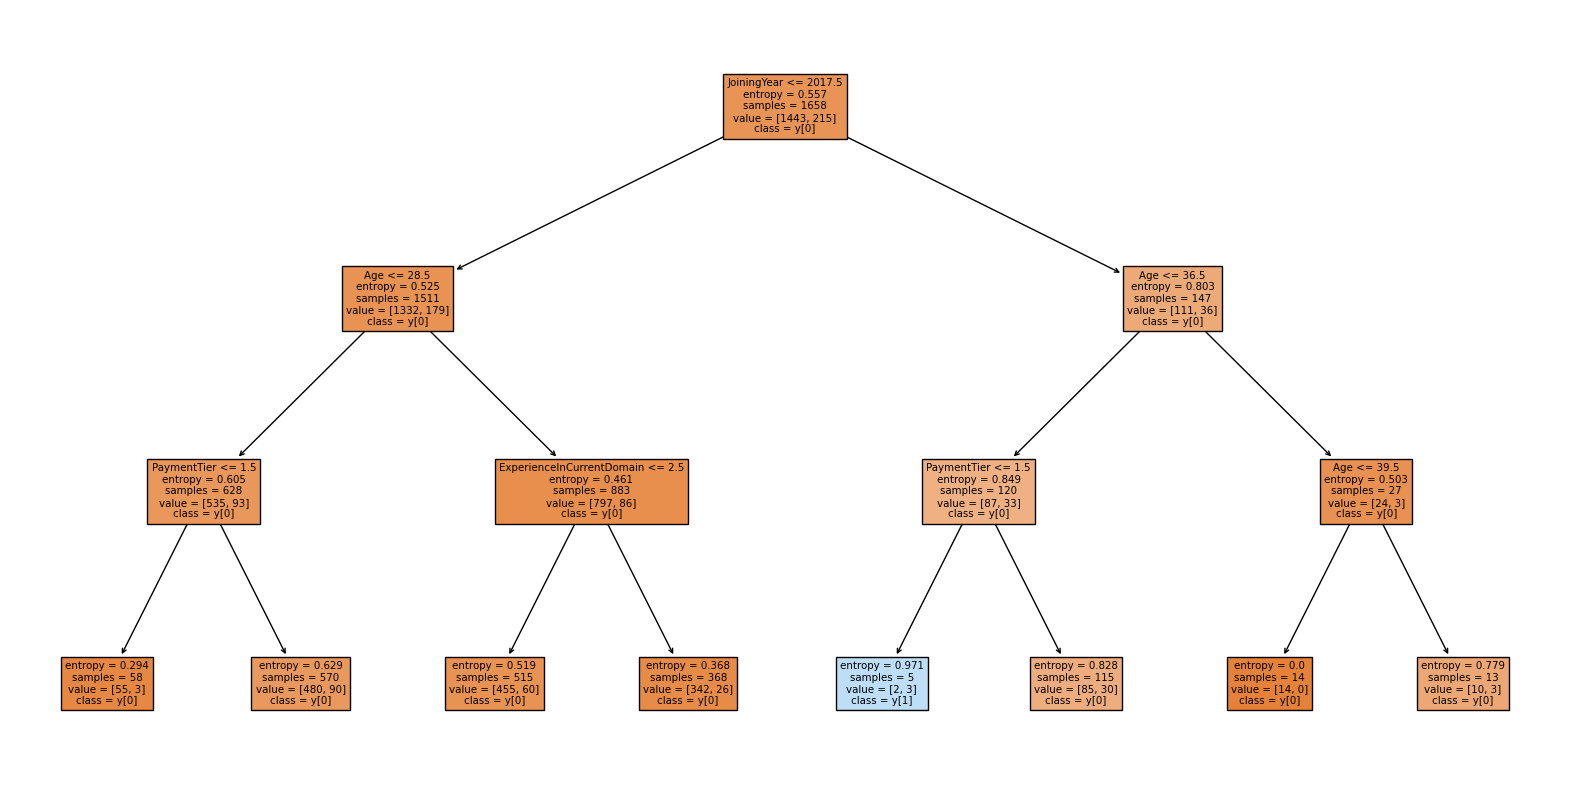

In [540]:
nama_fitur = ['JoiningYear','PaymentTier','Age','ExperienceInCurrentDomain','LeaveOrNot']
plt.figure(figsize=(20,10))
PT(dt, filled=True, feature_names=nama_fitur, class_names=True)
plt.show()

> Melakukan visualisasi data dengan metode decision tree menggunakan library Graphviz. Kode tersebut menghasilkan visualisasi dengan format PNG menggunakan data Graph Description Language.

In [541]:
data = EG(dt, out_file=None,
          feature_names=nama_fitur,
          class_names=list(map(str, set(y))),
          filled=True, rounded=True,
          special_characters=True)

graph = graphviz.Source(data)
graph.render("Decision Tree", format='png')

'Decision Tree.png'

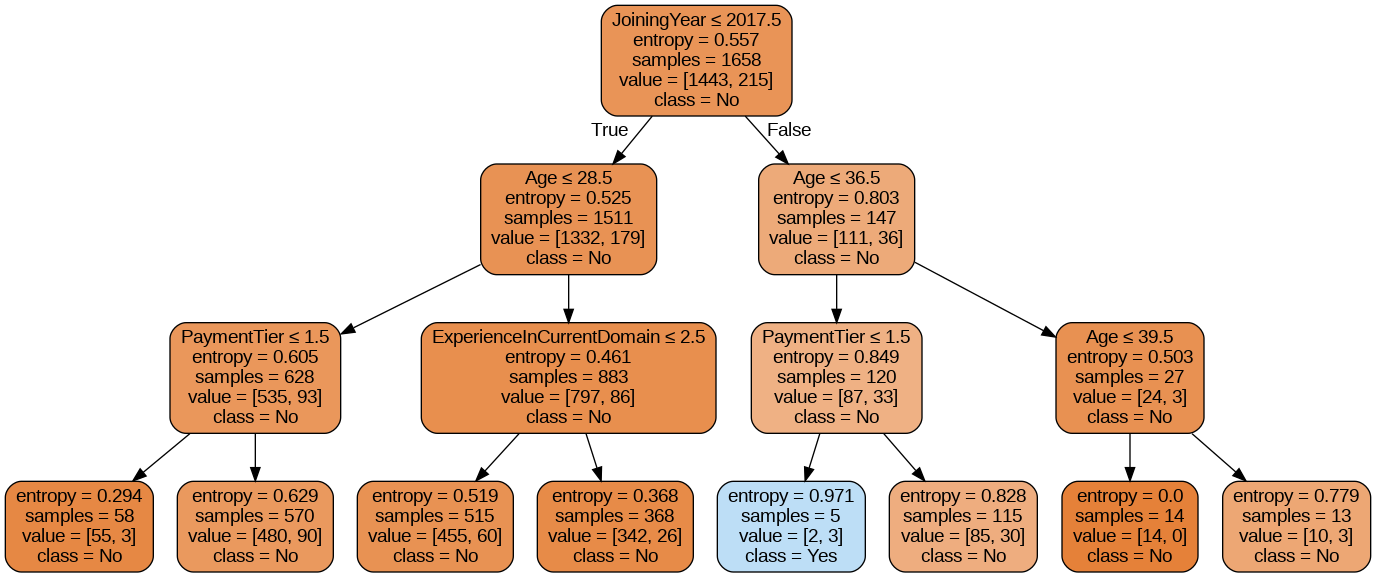

## Daftar Pustaka
[1] 	PT Bank OCBP NSIP, "Decision Tree: Pengertian, Manfaat, Cara Buat & Plus Minusnya," 23 May 2023. [Online]. Available: https://www.ocbcnisp.com/id/article/2023/06/20/decision-tree-adalah.

[2] 	Kaggle, "Employee dataset," [Online]. Available: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset. [Accessed 29 October 2023].